# 3 Sklearn



**STOP: If you have not completed Problem 2, please do that first!**

Finally, we will run through some exercises to get familiar with Sklearn, a machine learning library in python. In most of the practical settings, we won't need to write our own featurization method or ridge regression method as those are often provided for us in common libraries like Sklearn.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 3.1 Sklearn on the Polynomial Toy Model dataset

First, let's reimplement ridge regression on our polynomial toy model using the PolynomialFeatures and Ridge classes of Sklearn. We will first use sklearn's PolynomialFeatures class to lift the data into a degree 7 polynomial, then perform ridge regression on the dataset and report the training error and test error. Here's some useful documentation to get you started:

1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

**3.1.1. Implement the code below to generate a plot of the training and testing error over a range of lambdas and report the lambda with the best test error.**

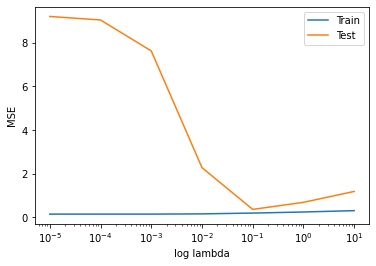

Best Loss: 0.362051825927621, Best Lambda: 0.1


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def generate_data(x_range, func, sigma=1, n=80):
    y_range = np.array([func(x) + np.random.normal(0, sigma) for x in x_range])
    random_indicies = np.arange(len(x_range))
    np.random.shuffle(random_indicies)
    x = x_range[random_indicies[:n]]
    y = y_range[random_indicies[:n]]
    return x, y

def mse(y_pred, y):
    return np.mean((y_pred - y)**2)

# Regenerating the polynomial toy model data
x_range = np.linspace(-3, 1, 101, endpoint=True)
func = lambda x: x**3 + 3*x**2 - 2
np.random.seed(123)
x, y = generate_data(x_range, func, 0.4, 80)
# Training and validation set split
N = 40
x_train = x[:N]
y_train = y[:N]
x_test = x[N:]
y_test = y[N:]

D = 7
lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
mses_train = []
mses_test = []
best_mse = float('inf')
best_lambd = None

# TODO: generate the polynomial features for X_train and X_test using PolynomialFeatures
### BEGIN CODE ###
poly = PolynomialFeatures(D)
X_train = poly.fit_transform(np.array(x_train).reshape(len(x_train),1))
X_test = poly.fit_transform(np.array(x_test).reshape(len(x_train),1))
### END CODE ###

for lambd in lambdas:
    # TODO: Train a Ridge model on the polynomial features and evaluate the mse for both training and test sets
    # HINT: the method mse() might be useful here
    ### BEGIN CODE ###
    sklearn_ridge = Ridge(alpha=lambd)
    sklearn_ridge.fit(X_train, y_train)
    y_pred_train = sklearn_ridge.predict(X_train)
    y_pred_test = sklearn_ridge.predict(X_test)
    train_loss = mse(y_pred_train, y_train)
    test_loss = mse(y_pred_test, y_test)
    mses_train.append(train_loss)
    mses_test.append(test_loss)
    if best_mse > test_loss:
        best_mse = test_loss
        best_lambd = lambd
    ### END CODE ###

plt.plot(lambdas, mses_train, label='Train')
plt.plot(lambdas, mses_test, label='Test')
plt.xscale('log')
plt.xlabel('log lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

print(f'Best Loss: {best_mse}, Best Lambda: {best_lambd}')


Compare this error chart with error chart we generated earlier without Sklearn. If you did the coding portion correctly, the results should be similar - which is expected.

## 3.2 Sklearn on a different dataset

Now that you've had an introduction to the Ridge and PolynomialFeature classes of the Sklearn library, let's practice implementing ridge regression using Sklearn on a different dataset.

**3.2.1 Run the cell below to visualize our new dataset:**

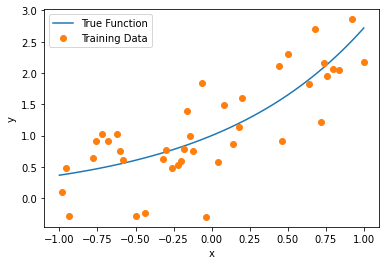

In [ ]:
x_range = np.linspace(-1, 1, 101, endpoint=True)
func = lambda x: np.exp(x)
np.random.seed(12)
x, y = generate_data(x_range, func, .4, 80)

# Training and validation set split, we'll just use 50/50 in this case
N = 40
x_train = x[:N]
y_train = y[:N]
x_test = x[N:]
y_test = y[N:]

# Plot the true function and training data
plt.plot(x_range, func(x_range), label='True Function')
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Again, let's try to fit this data with a degree 7 polynomial with ridge regression.

**3.2.2. Using the Sklearn library, write code below to visualize the training and testing errors over a range of lambdas and report the best lambda.*(hint: feel free to reference 3.1.1 to get you started)***

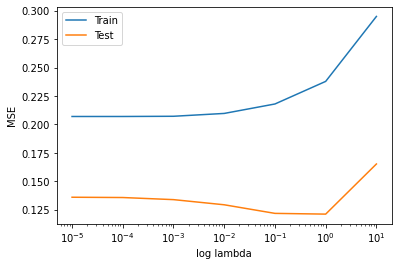

Best Loss: 0.12120140727658761, Best Lambda: 1


In [ ]:
### BEGIN CODE ###

D = 7

lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

mses_train = []
mses_test = []
best_mse = float('inf')
best_lambd = None

poly = PolynomialFeatures(D)
X_train = poly.fit_transform(np.array(x_train).reshape(len(x_train),1))
X_test = poly.fit_transform(np.array(x_test).reshape(len(x_test),1))

for lambd in lambdas:
    sklearn_ridge = Ridge(alpha=lambd)
    sklearn_ridge.fit(X_train, y_train)
    y_pred_train = sklearn_ridge.predict(X_train)
    y_pred_test = sklearn_ridge.predict(X_test)
    train_loss = mse(y_pred_train, y_train)
    test_loss = mse(y_pred_test, y_test)
    mses_train.append(train_loss)
    mses_test.append(test_loss)
    if best_mse > test_loss:
        best_mse = test_loss
        best_lambd = lambd

plt.plot(lambdas, mses_train, label='Train')
plt.plot(lambdas, mses_test, label='Test')
plt.xscale('log')
plt.xlabel('log lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

print(f'Best Loss: {best_mse}, Best Lambda: {best_lambd}')
### END CODE ###

**3.2.3. Fill in the best lambda below and run the cell to visualize our learned function. Do you think this was a good choice of lambda? Try other values of lambda as well and report your observations.**

YOUR OBSERVATIONS HERE: From the previous cell, we found the best lambda to be 1. The plot shows that ridge regression is able to learn the true function pretty well with this lambda. If we simply performed OLS by setting lambda to 0, we see that there is some clear overfitting for negative values of x. If we set lambda at 10, then we see that ridge regression has regularized the weights too much and our learned function is not good as well.

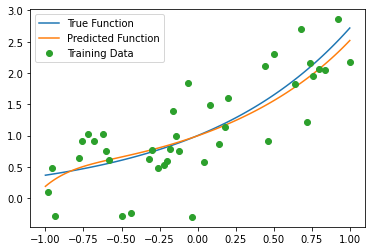

In [ ]:
LAMBD = 1 # Edit this
sklearn_ridge = Ridge(alpha=LAMBD)
sklearn_ridge.fit(X_train, y_train)
X_range = poly.fit_transform(np.array(x_range).reshape(len(x_range),1))
y_range_pred = sklearn_ridge.predict(X_range)
plt.plot(x_range, func(x_range), label='True Function')
plt.plot(x_range, y_range_pred, label=f'Predicted Function')
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.legend()
plt.show()

## 3.3 Additional Datasets for Practice

**3.3.1. Here are some more datasets you can use to practice implementing Ridge Regression with the Sklearn library. Feel free to explore other degrees of polynomial features as well.**


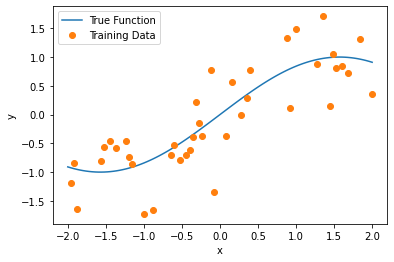

In [ ]:
dataset = 'sine' # Dataset 1: Sine Function
# dataset = 'sqrt' # Dataset 2: Square Root Function
# dataset = 'inverse' # Dataset 3: Inverse Function

if dataset == 'sine':
    x_range = np.linspace(-2, 2, 101, endpoint=True)
    func = lambda x: np.sin(x)
    np.random.seed(12)
    x, y = generate_data(x_range, func, .4, 80)

if dataset == 'sqrt':
    x_range = np.linspace(0, 10, 101, endpoint=True)
    func = lambda x: np.sqrt(x)
    np.random.seed(12)
    x, y = generate_data(x_range, func, .4, 80)

if dataset == 'inverse':
    x_range = np.linspace(.5, 1.5, 101, endpoint=True)
    func = lambda x: 1/x
    np.random.seed(12)
    x, y = generate_data(x_range, func, .2, 80)
    
# Training and validation set split, using 50/50 for now
N = 40
x_train = x[:N]
y_train = y[:N]
x_test = x[N:]
y_test = y[N:]

# Plot the true function and training data
plt.plot(x_range, func(x_range), label='True Function')
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()